In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm

from scipy import stats
import seaborn as sns
sns.set(style="ticks")
from scipy.optimize import curve_fit
import os
import numpy as np
import glob
import scipy as sc
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

In [2]:
# Define exponential function func,  
# where a = alpha, b = Tau, c = y intercept

def fit_to_exponential(x, a, b, c):
     return a * np.exp(-(x / b)) + c

In [3]:
def linearRegression(df):
    x = df[df.DiscoveryTime.notnull()].trialNum.values
    y = df[df.DiscoveryTime.notnull()].DiscoveryTime.values

    slope, intercept, r_value, p_value, std_err = sc.stats.linregress(x, y)
    
    return(slope, intercept, r_value, p_value, std_err)

# Individual floral shape

In [4]:
direc = r'E:\Downloads\ManducaMultiSenseData\v3\Step6_v3\\'
outpath_fig = r'E:\Downloads\ManducaMultiSenseData\v3\Step6_v3\Figure\\'

# Draw the learning curves with the exponential fit

In [5]:
#parameters used for figure making

Lightlevel = ['L0.1', "L50"]

#define the colors for low and high light levels
mc = ['black', 'grey' ]
c = [ 'mediumpurple', 'darkorange']

In [6]:
def plot_LearningCurve(ax, Lightlevel, direc, offset_label, 
                       outliers = False, xlimit = True, ylimit = True, label = False):
    
    if Lightlevel == 'L0.1':
        idx = 0
        
    else:
        idx = 1
        
    if outliers:
        suffix = ''
    else:
        suffix = '_notoutliers'
    
    path = glob.glob(direc + "\\" + Lightlevel + 'Allmoths' + suffix + '.csv')[0]
    new_df = pd.read_csv(path)
    
    xdata_notnan = new_df[new_df.DiscoveryTime.notnull()].trialNum.values
    ydata_notnan = new_df[new_df.DiscoveryTime.notnull()].DiscoveryTime.values

    x = new_df[new_df.name.str.contains(Lightlevel) & new_df.DiscoveryTime.notnull()].trialNum
    y = new_df[new_df.name.str.contains(Lightlevel) & new_df.DiscoveryTime.notnull()].DiscoveryTime
    
    Data = pd.read_csv(direc + Lightlevel + "Allmoths_notoutliers.csv")
    Data['DiscoveryTime'] = Data.DiscoveryTime/100

    
    ax = sns.relplot(x = "trialNum", y = "DiscoveryTime", hue = 'condition', data = Data, palette=[c[idx]], alpha = 0.7, height = 5, aspect = 5/3.4, legend = None)
    
    
    
     

    max_trial = max(new_df.trialNum)

    param_file = glob.glob(direc + Lightlevel + '_FittedParameters' + suffix + '.csv')
    param_df = pd.read_csv(param_file[0])

    ix = 1 # pick all the 1/4 length data from the parameter df (because 1/4 length data slope is = 0 across all shapes)
    a0 = param_df.loc[ix,'alpha']
    mean_y0 = param_df.loc[ix, 'y_intercept']
    tau = param_df.loc[ix, 'tau']
    
    
    
    sns.lineplot(range(0,max_trial), fit_to_exponential(range(0,max_trial), a0, tau, mean_y0), color = mc[idx])
    
    axes = ax.axes.flatten()
    axes[0].text(0.47, 0.55 - offset_label
             , 'N= ' + str(len(y)) + ' visits' 
             , transform=axes[0].transAxes
             , verticalalignment='bottom'
             , size = 13
            , color = 'k')
    axes[0].set_xlim(-2,50)
    axes[0].set_ylim(-2,28)
    for tick in axes[0].get_xticklabels():
        tick.set_fontsize(20) 
    for tick in axes[0].get_yticklabels():
        tick.set_fontsize(20) 
    
    ax.set_xlabels('Visit Number', fontsize = 25)

    ax.set_ylabels('Exploration Time (s)', fontsize = 25)


In [7]:
fig1, ax0 = plt.subplots(figsize = (12,9))
plt.close()

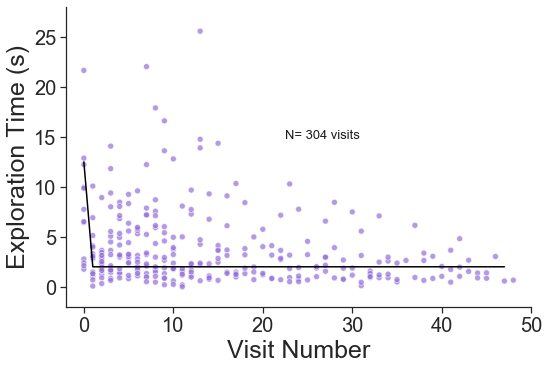

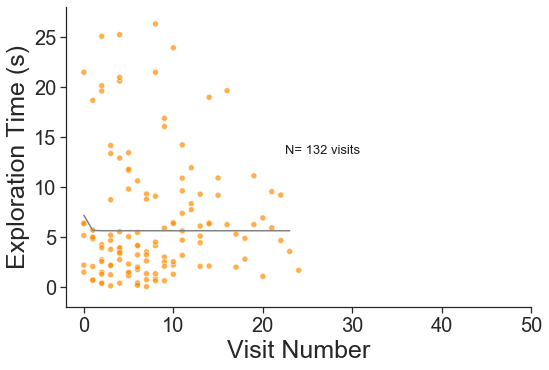

In [8]:
jj = 0
for idx, ll in enumerate(Lightlevel):
    plot_LearningCurve(ax0, ll, direc, jj, outliers= True)
    jj+=0.05

fig1.tight_layout()
fig1.savefig(outpath_fig + "\\" + 'WithOutlier_OnePlot_LearningCurve' + '.png')

C:\Users\guess\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


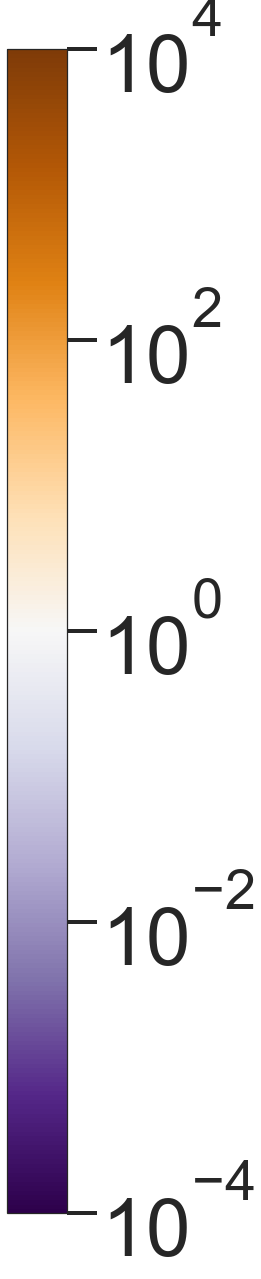

In [9]:
import pylab as pl
import numpy as np
import matplotlib.colors
from matplotlib.ticker import LogFormatter

a = np.array([[10**-4,10**4]])
ax = pl.figure(figsize=(4.170, 32.34))
img = pl.imshow(a, cmap="PuOr_r", norm=matplotlib.colors.LogNorm(10**-4,10**4))
# formatter = LogFormatter(10, labelOnlyBase=True) 
pl.yscale('log')
pl.xscale('log')
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.2, 0.5])
plt.colorbar(orientation="vertical", cax=cax, ticks=[10**-4, 10**-2, 10**0, 10**2,10**4], format=None)
pl.tight_layout()
pl.tick_params(length = 30, width = 4, labelsize = 80)


plt.savefig(r"E:\Downloads\ManducaMultiSenseData\Moth_Visits_Information\colorbar.png")